In [1]:
from sklearn import tree
from sklearn import svm
from sklearn import ensemble
import seaborn as sns
from sklearn import neighbors
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_blobs
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel("data.xlsx")

### Performing basic descriptive analysis and summary

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4455 entries, 0 to 4454
Data columns (total 14 columns):
Status       4455 non-null int64
Seniority    4455 non-null int64
Home         4455 non-null int64
Time         4455 non-null int64
Age          4455 non-null int64
Marital      4455 non-null int64
Records      4455 non-null int64
Job          4455 non-null int64
Expenses     4455 non-null int64
Income       4455 non-null int64
Assets       4455 non-null int64
Debt         4455 non-null int64
Amount       4455 non-null int64
Price        4455 non-null int64
dtypes: int64(14)
memory usage: 487.4 KB


In [4]:
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


#### Checking the Null values in the data

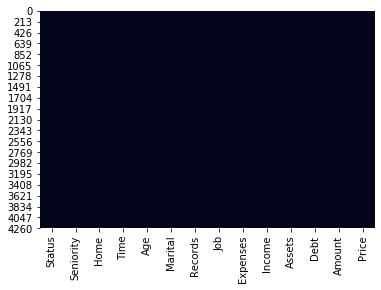

In [5]:
# Overview of missing data

sns.heatmap(df.isnull(), cbar=False)

In [6]:
df.isnull().sum().sort_values(ascending=False)

Price        0
Amount       0
Debt         0
Assets       0
Income       0
Expenses     0
Job          0
Records      0
Marital      0
Age          0
Time         0
Home         0
Seniority    0
Status       0
dtype: int64

### "- 0 and 99999999 - missing values or data collection problems marked for categorical and numerical variables respectively"

#### Fixing the Target Variable

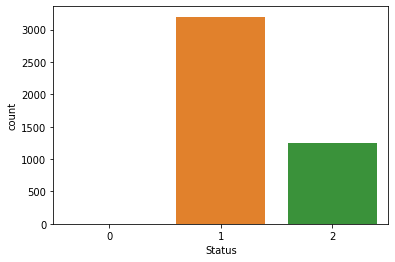

In [7]:
sns.countplot(df['Status'])

In [8]:
df['Status']=df['Status'].replace(1,0)

In [9]:
df['Status']=df['Status'].replace(2,1)

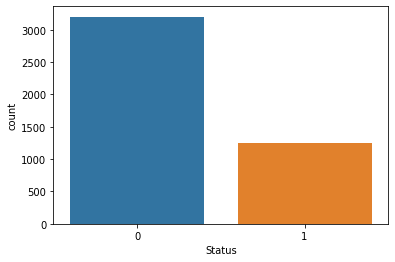

In [10]:
sns.countplot(df['Status'])

#### Removing 0 from other categorical variables

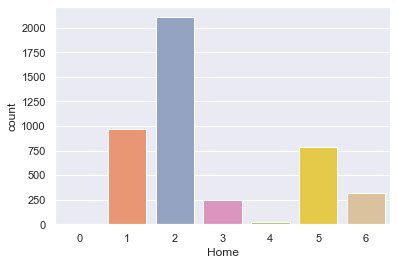

In [11]:
sns.set(style="darkgrid")
sns.countplot(df['Home'],palette="Set2")

In [12]:
len(df[df['Home']==0])   # Only six values

6

In [13]:
df=df[df['Home']>0]

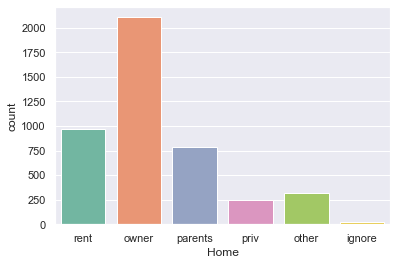

In [14]:
sns.set(style="darkgrid")
df["Home"] = df.Home.map({1: "rent", 2 : "owner", 3 : "priv", 4 :"ignore",5:"parents",6:"other"})
sns.countplot(df['Home'],palette="Set2")

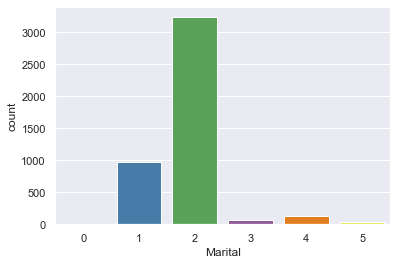

In [15]:
sns.set(style="darkgrid")
sns.countplot(df['Marital'],palette="Set1")

In [16]:
len(df[df['Marital']==0])   # Only one value

1

In [17]:
df=df[df['Marital']>0]

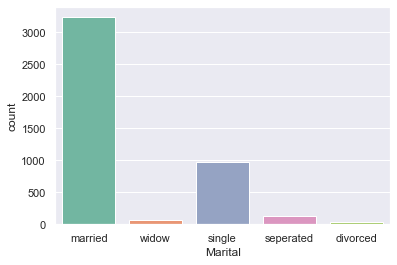

In [18]:

df["Marital"] = df.Marital.map({1: "single", 2 : "married", 3 : "widow", 4 :"seperated",5:"divorced"})
sns.countplot(df['Marital'],palette="Set2")

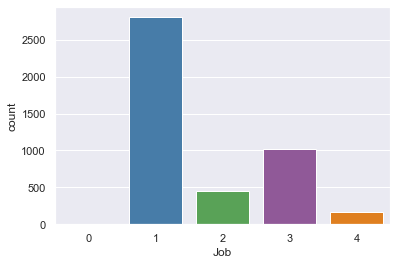

In [19]:
sns.set(style="darkgrid")
sns.countplot(df['Job'],palette="Set1")

In [20]:
len(df[df['Job']==0]) # Only one value

1

In [21]:
df=df[df['Job']>0]

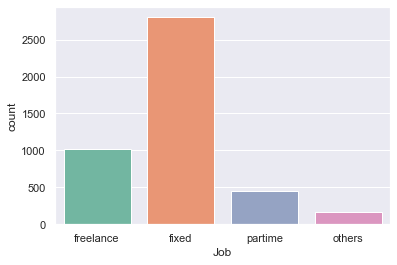

In [22]:
sns.set(style="darkgrid")
df["Job"] = df.Job.map({1: "fixed", 2 : "partime", 3 : "freelance",4:"others"})
sns.countplot(df['Job'],palette="Set2")

In [23]:
df["Records"] = df.Records.map({1: "no_rec", 2 : "yes_rec"})

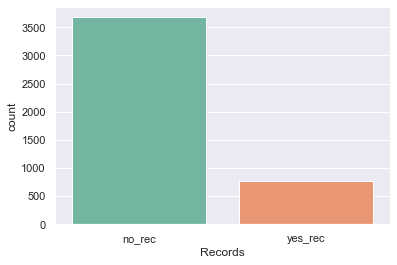

In [24]:
sns.set(style="darkgrid")
sns.countplot(df['Records'],palette="Set2")

In [25]:
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,0,9,rent,60,30,married,no_rec,freelance,73,129,0,0,800,846
1,0,17,rent,60,58,widow,no_rec,fixed,48,131,0,0,1000,1658
2,1,10,owner,36,46,married,yes_rec,freelance,90,200,3000,0,2000,2985
3,0,0,rent,60,24,single,no_rec,fixed,63,182,2500,0,900,1325
4,0,0,rent,36,26,single,no_rec,fixed,46,107,0,0,310,910


#### Now looking at the Numerical Values

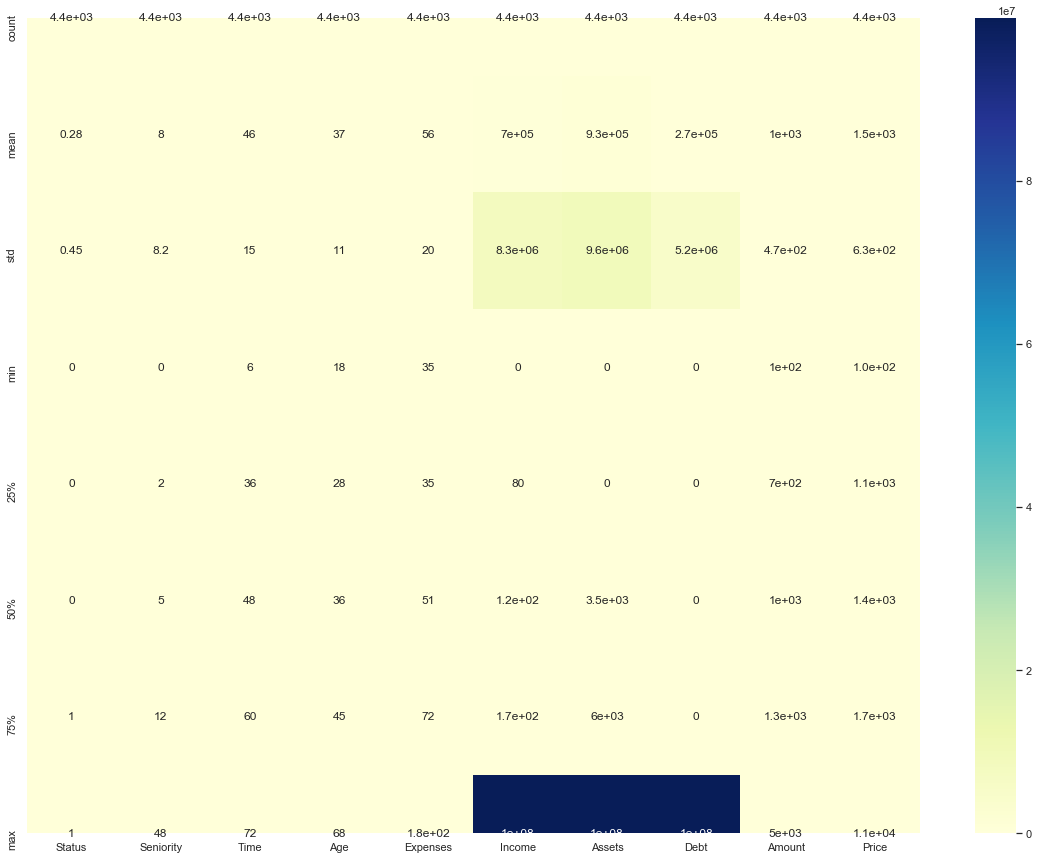

In [26]:
plt.figure(figsize=(20, 15))
sns.heatmap(df.describe(),annot=True, cmap="YlGnBu")

#### Looks like Income, Assets, Debt got a few 99999999, lets look at the numbers if they are significant in values, then will think about a process to replace them by mean or median based on distribution.

#### Else may be its better to dicsrd them for now

In [27]:
len(df[df['Income']==99999999]) # Only 31 points, it is better to dicard them for now

31

In [28]:
df=df[df['Income']<99999999]

In [29]:
len(df[df['Assets']==99999999])

40

In [30]:
df=df[df['Assets']<99999999]

In [31]:
len(df[df['Debt']==99999999])

0

In [32]:
df.describe()

,Status,Seniority,Time,Age,Expenses,Income,Assets,Debt,Amount,Price
count,4376.000000,4376.000000,4376.000000,4376.000000,4376.000000,4376.000000,4376.000000,4376.000000,4376.000000,4376.000000
mean,0.277879,7.985603,46.521938,37.018967,55.590494,130.852834,5297.906079,342.473263,1037.569470,1459.830210
std,0.448005,8.173044,14.619032,10.973437,19.451837,86.190056,10581.224928,1217.494647,469.751882,621.738638
min,0.000000,0.000000,6.000000,18.000000,35.000000,0.000000,0.000000,0.000000,100.000000,105.000000
25%,0.000000,2.000000,36.000000,28.000000,35.000000,80.000000,0.000000,0.000000,700.000000,1116.750000
50%,0.000000,5.000000,48.000000,36.000000,51.000000,120.000000,3000.000000,0.000000,1000.000000,1400.000000
75%,1.000000,12.000000,60.000000,45.000000,72.000000,165.000000,6000.000000,0.000000,1300.000000,1688.250000
max,1.000000,48.000000,72.000000,68.000000,173.000000,959.000000,250000.000000,30000.000000,4500.000000,11140.000000


#### looks better now, but need to keep in mind that we have removed 71 data points from our set to achive this, which could be valueable later

### Looking for Outliers

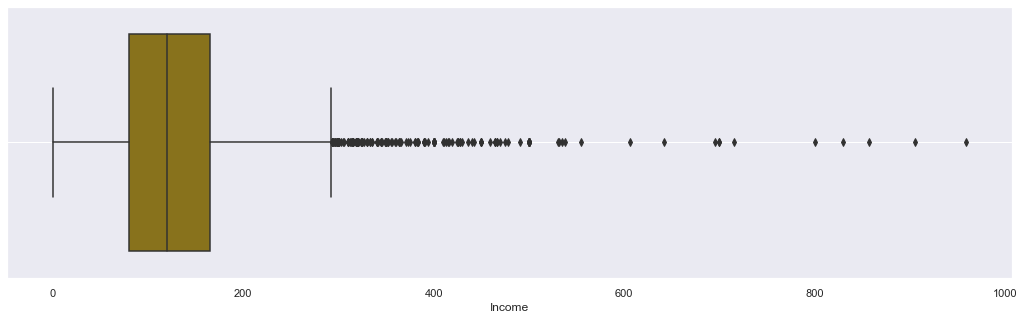

In [33]:
 #Checking for outliers

plt.figure(figsize=(18,5))
sns.boxplot(y="Income",data=df, orient="h", color="#9A7D0A")
sns.set_color_codes(palette="colorblind")
#sns.distplot(df['X18'],color="#BB8FCE", ax=axes[1])
plt.grid()

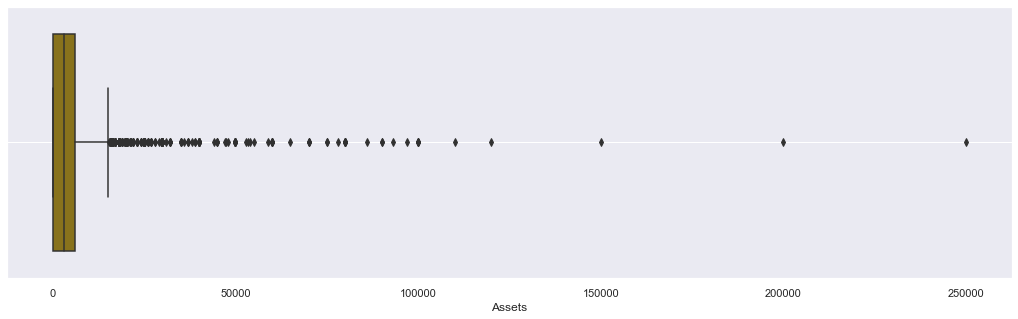

In [34]:
 #Checking for outliers

plt.figure(figsize=(18,5))
sns.boxplot(y="Assets",data=df, orient="h", color="#9A7D0A")
sns.set_color_codes(palette="colorblind")
#sns.distplot(df['X18'],color="#BB8FCE", ax=axes[1])
plt.grid()

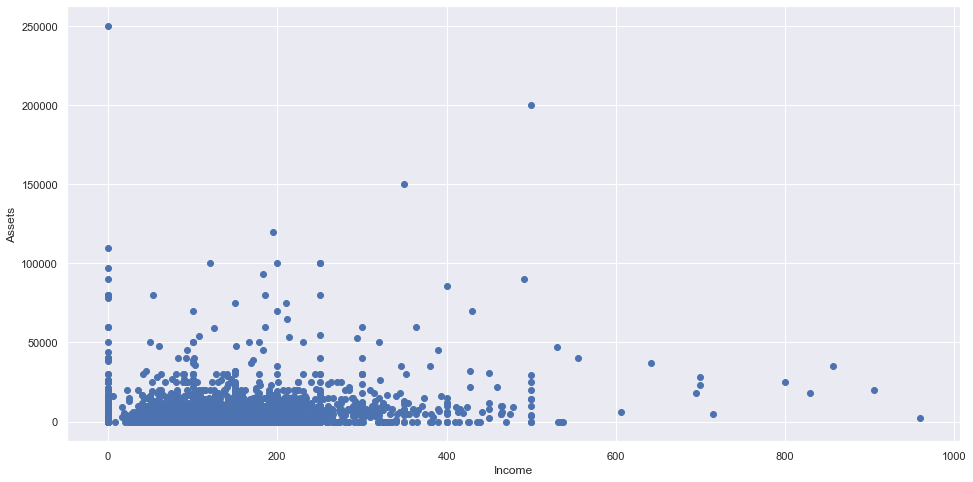

In [35]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['Income'], df['Assets'])
ax.set_xlabel('Income')
ax.set_ylabel('Assets')
plt.show()

### Removing the outliers for now, if required, we will come back to them later for seperate analysis

In [36]:
from scipy import stats

In [37]:
df = df[np.abs(df["Income"]-df["Income"].mean())<=(3*df["Income"].std())] 

In [38]:
df = df[np.abs(df["Assets"]-df["Assets"].mean())<=(3*df["Assets"].std())] 

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4239 entries, 0 to 4454
Data columns (total 14 columns):
Status       4239 non-null int64
Seniority    4239 non-null int64
Home         4239 non-null object
Time         4239 non-null int64
Age          4239 non-null int64
Marital      4239 non-null object
Records      4239 non-null object
Job          4239 non-null object
Expenses     4239 non-null int64
Income       4239 non-null int64
Assets       4239 non-null int64
Debt         4239 non-null int64
Amount       4239 non-null int64
Price        4239 non-null int64
dtypes: int64(10), object(4)
memory usage: 496.8+ KB


In [40]:
#def remove_outlier(df):
 #   low = .05
 ##   high = .95
  #  quant_df = df.quantile([low, high])
  #  for name in list(df.columns):
   #     if is_numeric_dtype(df[name]):
    #        df = df[(df["Income"] > quant_df.loc[low, name]) 
   #                 & (df["Income"] < quant_df.loc[high, name])]
  #  return df


In [41]:
#remove_outlier(df["Income"]).head()

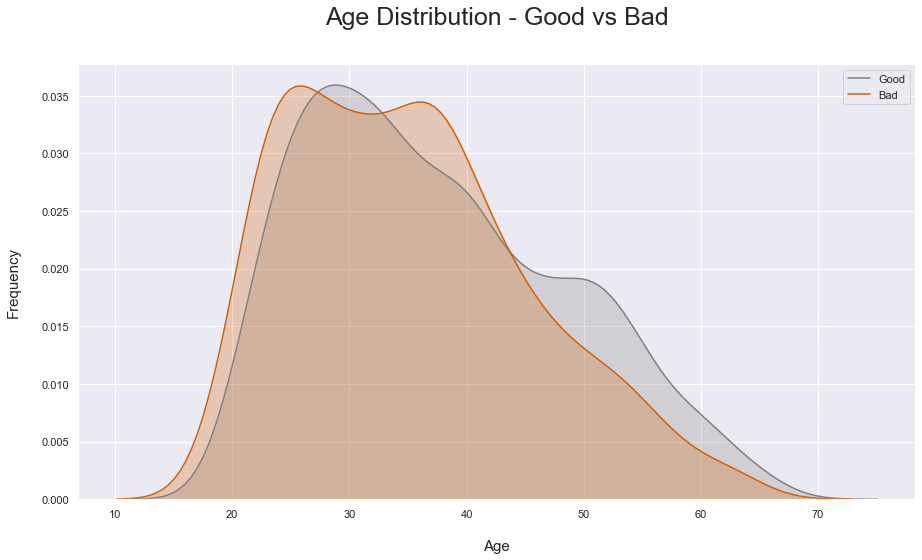

In [42]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,8),)
ax=sns.kdeplot(df.loc[(df['Status'] == 0),'Age'] , color='gray',shade=True,label='Good')
ax=sns.kdeplot(df.loc[(df['Status'] == 1),'Age'] , color='r',shade=True, label='Bad')
plt.title('Age Distribution - Good vs Bad', fontsize = 25, pad = 40)
plt.xlabel("Age", fontsize = 15, labelpad = 20)
plt.ylabel('Frequency', fontsize = 15, labelpad= 20);

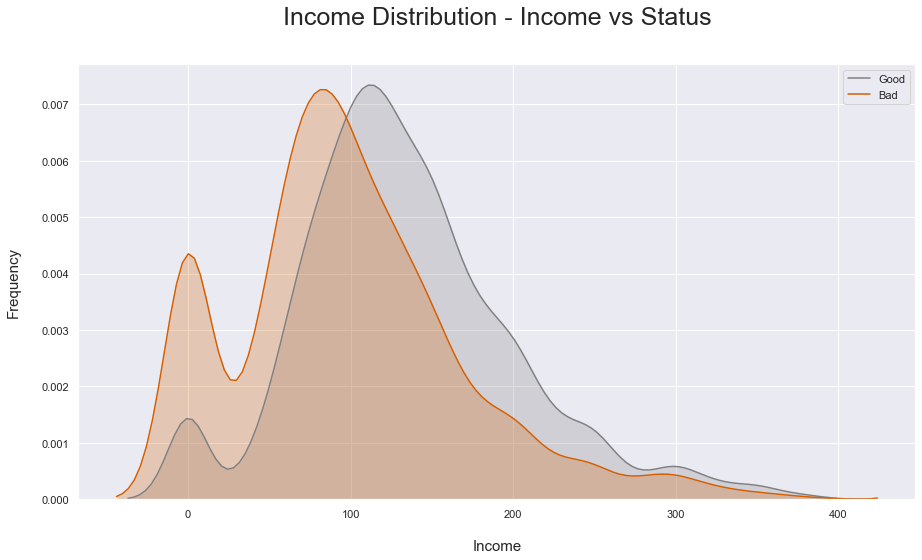

In [43]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,8),)
ax=sns.kdeplot(df.loc[(df['Status'] == 0),'Income'] , color='gray',shade=True,label='Good')
ax=sns.kdeplot(df.loc[(df['Status'] == 1),'Income'] , color='r',shade=True, label='Bad')
plt.title('Income Distribution - Income vs Status', fontsize = 25, pad = 40)
plt.xlabel("Income", fontsize = 15, labelpad = 20)
plt.ylabel('Frequency', fontsize = 15, labelpad= 20);

### Interesting pattern 1: Lesser income people might be more likely to default

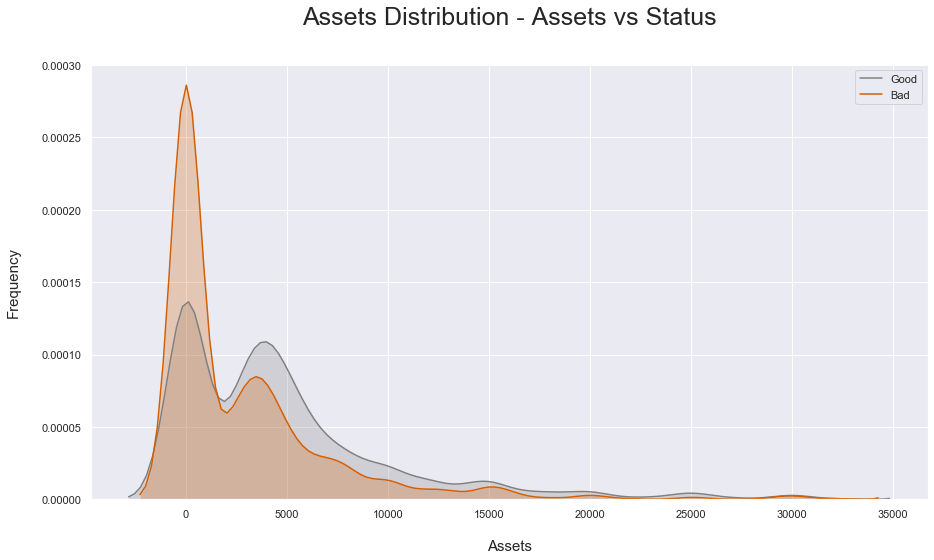

In [44]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,8),)
ax=sns.kdeplot(df.loc[(df['Status'] == 0),'Assets'] , color='gray',shade=True,label='Good')
ax=sns.kdeplot(df.loc[(df['Status'] == 1),'Assets'] , color='r',shade=True, label='Bad')
plt.title('Assets Distribution - Assets vs Status', fontsize = 25, pad = 40)
plt.xlabel("Assets", fontsize = 15, labelpad = 20)
plt.ylabel('Frequency', fontsize = 15, labelpad= 20);

### Interesting pattern 2: looks like people who have no assets might have no fear of loosing anything and they might default

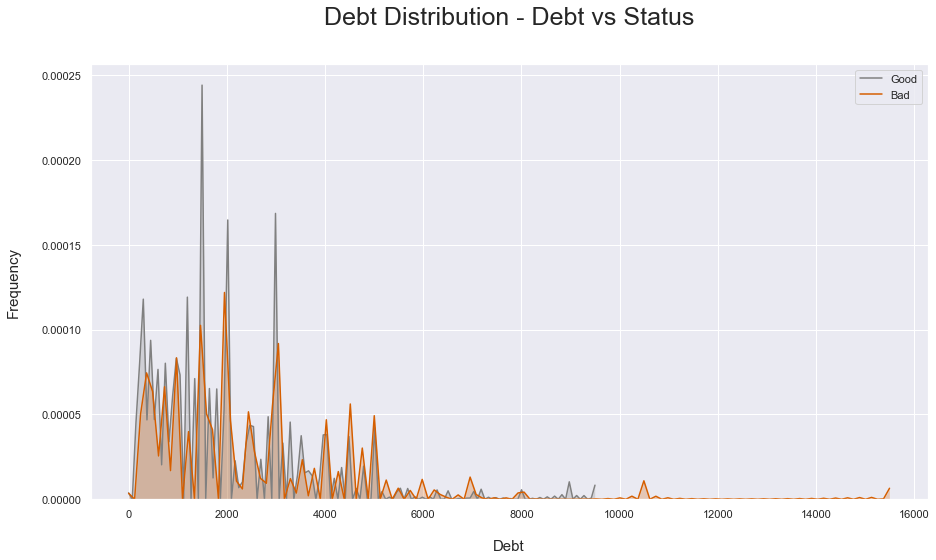

In [45]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,8),)
ax=sns.kdeplot(df.loc[(df['Status'] == 0),'Debt'] , color='gray',shade=True,label='Good')
ax=sns.kdeplot(df.loc[(df['Status'] == 1),'Debt'] , color='r',shade=True, label='Bad')
plt.title('Debt Distribution - Debt vs Status', fontsize = 25, pad = 40)
plt.xlabel("Debt", fontsize = 15, labelpad = 20)
plt.ylabel('Frequency', fontsize = 15, labelpad= 20);

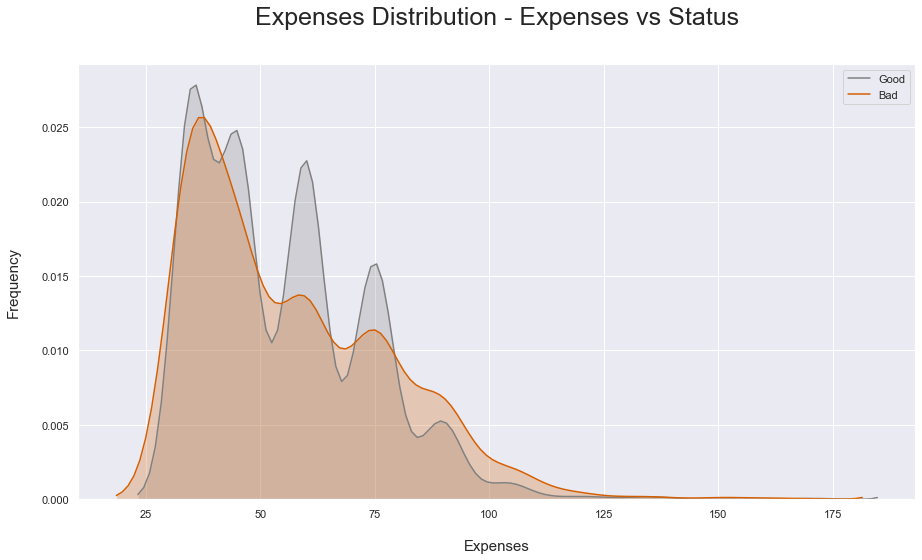

In [46]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,8),)
ax=sns.kdeplot(df.loc[(df['Status'] == 0),'Expenses'] , color='gray',shade=True,label='Good')
ax=sns.kdeplot(df.loc[(df['Status'] == 1),'Expenses'] , color='r',shade=True, label='Bad')
plt.title('Expenses Distribution - Expenses vs Status', fontsize = 25, pad = 40)
plt.xlabel("Expenses", fontsize = 15, labelpad = 20)
plt.ylabel('Frequency', fontsize = 15, labelpad= 20);

### Creating a new feature in data, Spent percentage to check some patterns

In [47]:
df["SpentPercentage"]= df["Expenses"]/df["Income"]

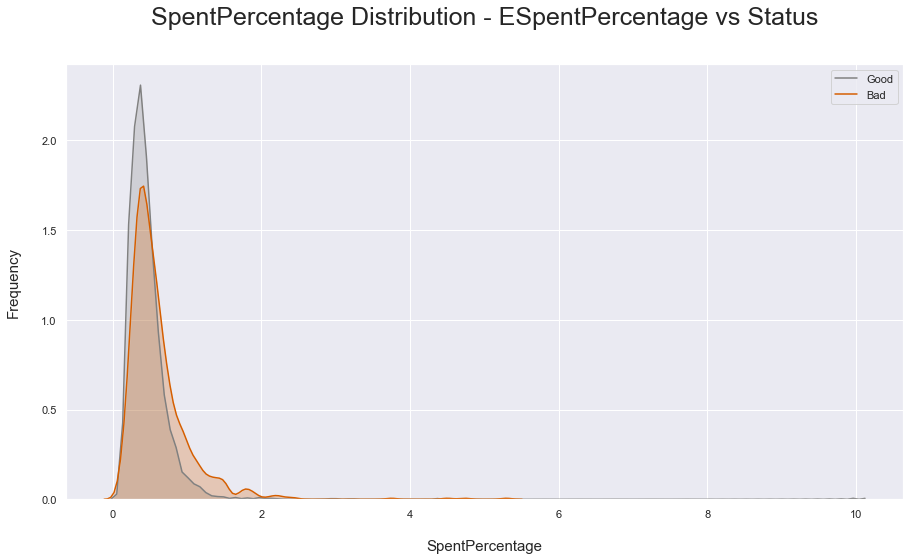

In [48]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,8),)
ax=sns.kdeplot(df.loc[(df['Status'] == 0),'SpentPercentage'] , color='gray',shade=True,label='Good')
ax=sns.kdeplot(df.loc[(df['Status'] == 1),'SpentPercentage'] , color='r',shade=True, label='Bad')
plt.title('SpentPercentage Distribution - ESpentPercentage vs Status', fontsize = 25, pad = 40)
plt.xlabel("SpentPercentage", fontsize = 15, labelpad = 20)
plt.ylabel('Frequency', fontsize = 15, labelpad= 20);

### Interesting pattern 3: People who have higher spend percentage compared to their income, might have the tendency to default more - But this one might not be very prominent

In [49]:
df["Savings"]= df["Income"]-df["Expenses"]

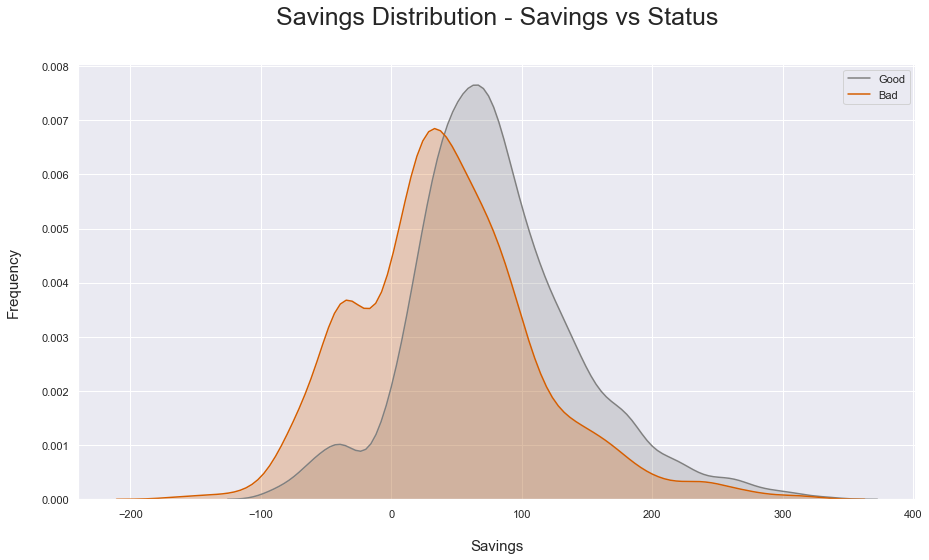

In [50]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,8),)
ax=sns.kdeplot(df.loc[(df['Status'] == 0),'Savings'] , color='gray',shade=True,label='Good')
ax=sns.kdeplot(df.loc[(df['Status'] == 1),'Savings'] , color='r',shade=True, label='Bad')
plt.title('Savings Distribution - Savings vs Status', fontsize = 25, pad = 40)
plt.xlabel("Savings", fontsize = 15, labelpad = 20)
plt.ylabel('Frequency', fontsize = 15, labelpad= 20);

### Interesting pattern 4: People who have lower savings, might have the tendency to default more - This is more seperable

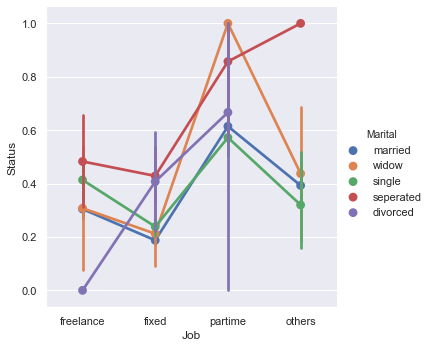

In [51]:
sns.factorplot('Job','Status',hue='Marital',data=df)
plt.show()

#### Looks like people with part time jobs might be more likely to default

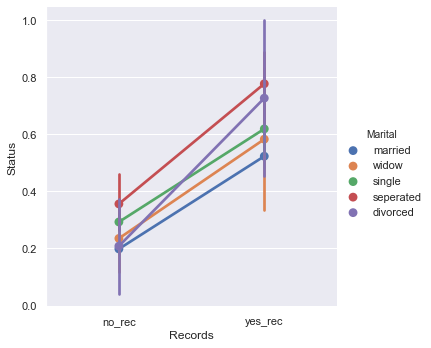

In [52]:
sns.factorplot('Records','Status',hue='Marital',data=df)
plt.show()

### People with records might be more likly to default

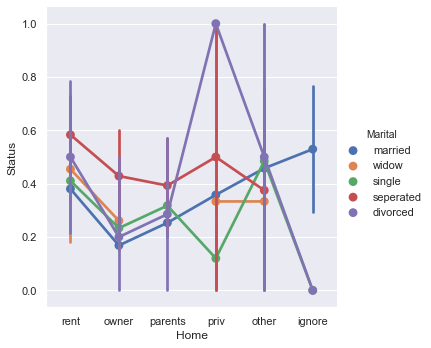

In [53]:
sns.factorplot('Home','Status',hue='Marital',data=df)
plt.show()

#### Divorced or Seperated people might be more likly to default

In [54]:
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price,SpentPercentage,Savings
0,0,9,rent,60,30,married,no_rec,freelance,73,129,0,0,800,846,0.565891,56
1,0,17,rent,60,58,widow,no_rec,fixed,48,131,0,0,1000,1658,0.366412,83
2,1,10,owner,36,46,married,yes_rec,freelance,90,200,3000,0,2000,2985,0.450000,110
3,0,0,rent,60,24,single,no_rec,fixed,63,182,2500,0,900,1325,0.346154,119
4,0,0,rent,36,26,single,no_rec,fixed,46,107,0,0,310,910,0.429907,61


In [55]:
df=df.drop("SpentPercentage",axis=1) # Dropping it here as it gives a lot of null valueo due to divison by zero

In [56]:
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price,Savings
0,0,9,rent,60,30,married,no_rec,freelance,73,129,0,0,800,846,56
1,0,17,rent,60,58,widow,no_rec,fixed,48,131,0,0,1000,1658,83
2,1,10,owner,36,46,married,yes_rec,freelance,90,200,3000,0,2000,2985,110
3,0,0,rent,60,24,single,no_rec,fixed,63,182,2500,0,900,1325,119
4,0,0,rent,36,26,single,no_rec,fixed,46,107,0,0,310,910,61


## Model building

In [57]:
y=(df["Status"])

In [58]:
cat_feats = ['Home','Marital','Records','Job']

In [59]:
final_data = pd.get_dummies(df,columns=cat_feats,drop_first=True)

In [60]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4239 entries, 0 to 4454
Data columns (total 24 columns):
Status               4239 non-null int64
Seniority            4239 non-null int64
Time                 4239 non-null int64
Age                  4239 non-null int64
Expenses             4239 non-null int64
Income               4239 non-null int64
Assets               4239 non-null int64
Debt                 4239 non-null int64
Amount               4239 non-null int64
Price                4239 non-null int64
Savings              4239 non-null int64
Home_other           4239 non-null uint8
Home_owner           4239 non-null uint8
Home_parents         4239 non-null uint8
Home_priv            4239 non-null uint8
Home_rent            4239 non-null uint8
Marital_married      4239 non-null uint8
Marital_seperated    4239 non-null uint8
Marital_single       4239 non-null uint8
Marital_widow        4239 non-null uint8
Records_yes_rec      4239 non-null uint8
Job_freelance        4239 non-nu

In [61]:
final_data['Status'].value_counts(normalize=True)

0    0.718566
1    0.281434
Name: Status, dtype: float64

In [62]:
y = final_data['Status']
X = final_data.drop(['Status'],axis=1)

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

### Decision tree - Using tree based cliassifiers as the data is not normalized - we could try with other models after normalizing later

In [64]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [65]:
predictions = dtree.predict(X_test)

In [66]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [67]:
print(confusion_matrix(y_test,predictions))

[[499 125]
 [111 113]]


In [68]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81       624
           1       0.47      0.50      0.49       224

    accuracy                           0.72       848
   macro avg       0.65      0.65      0.65       848
weighted avg       0.73      0.72      0.72       848



### Random Forest

In [69]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=200, random_state=0)  
classifier.fit(X_train, y_train)  
predictions = classifier.predict(X_test)

In [70]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test,predictions ))  
print(accuracy_score(y_test, predictions ))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88       624
           1       0.70      0.47      0.56       224

    accuracy                           0.81       848
   macro avg       0.77      0.70      0.72       848
weighted avg       0.80      0.81      0.79       848

0.8077830188679245


In [71]:
final_data.head()

,Status,Seniority,Time,Age,Expenses,Income,Assets,Debt,Amount,Price,...,Home_priv,Home_rent,Marital_married,Marital_seperated,Marital_single,Marital_widow,Records_yes_rec,Job_freelance,Job_others,Job_partime
0,0,9,60,30,73,129,0,0,800,846,...,0,1,1,0,0,0,0,1,0,0
1,0,17,60,58,48,131,0,0,1000,1658,...,0,1,0,0,0,1,0,0,0,0
2,1,10,36,46,90,200,3000,0,2000,2985,...,0,0,1,0,0,0,1,1,0,0
3,0,0,60,24,63,182,2500,0,900,1325,...,0,1,0,0,1,0,0,0,0,0
4,0,0,36,26,46,107,0,0,310,910,...,0,1,0,0,1,0,0,0,0,0


In [72]:
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV

In [73]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

<Figure size 432x288 with 0 Axes>

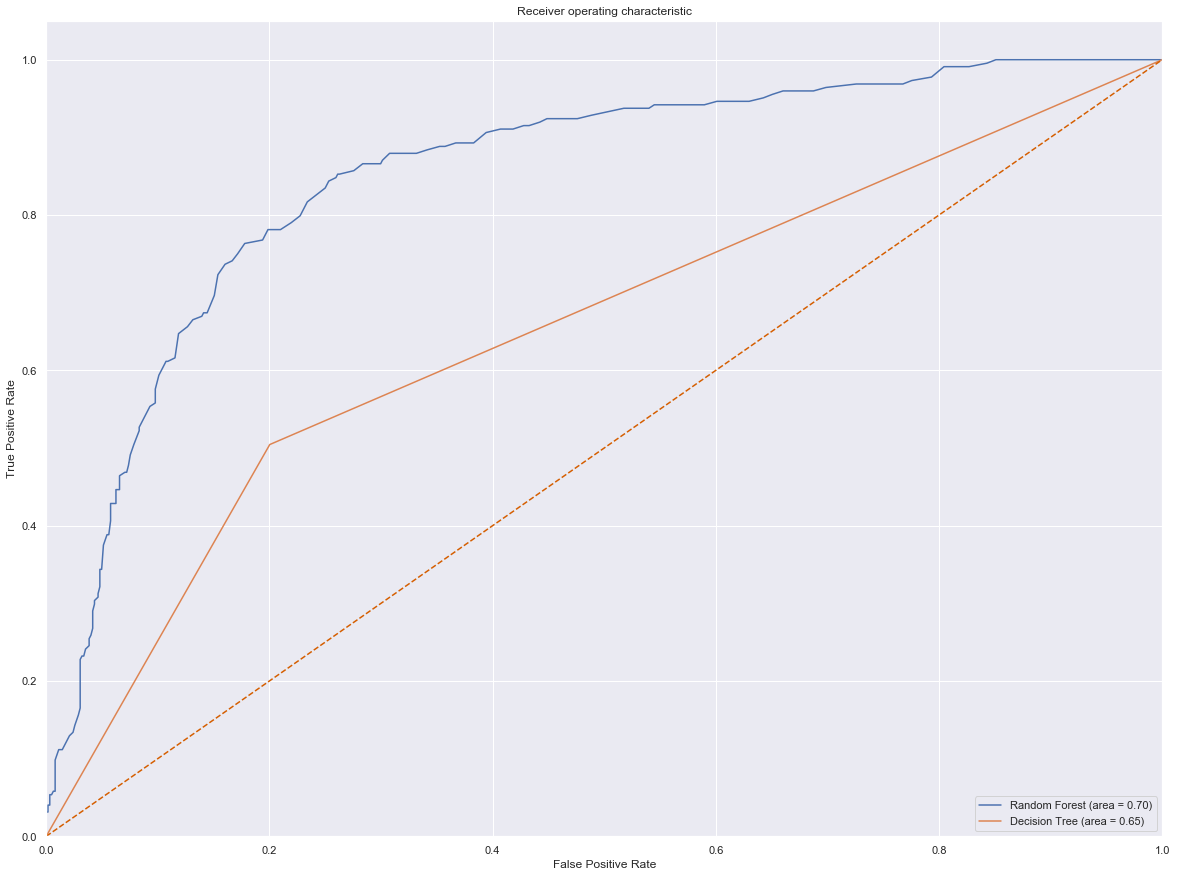

In [74]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

rf_roc_auc = roc_auc_score(y_test, classifier.predict(X_test))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure()

dtree_roc_auc = roc_auc_score(y_test, dtree.predict(X_test))
dpr, spr, thresholds = roc_curve(y_test, dtree.predict_proba(X_test)[:,1])


plt.figure(figsize=(20, 15))
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot(dpr, spr, label='Decision Tree (area = %0.2f)' % dtree_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC')
plt.show()

### Random forrest certainly is working better on the model - with more area under the curve

### compared to Decision tree

### Lets try some Boosting

In [75]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)
result=cross_val_score(ada,X,y,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoost is:',result.mean())

The cross validated score for AdaBoost is: 0.798538627949507


In [76]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
result=cross_val_score(grad,X,y,cv=10,scoring='accuracy')
print('The cross validated score for Gradient Boosting is:',result.mean())

The cross validated score for Gradient Boosting is: 0.793111869396494


In [77]:
import xgboost as xg
xgboost=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
result=cross_val_score(xgboost,X,y,cv=10,scoring='accuracy')
print('The cross validated score for XGBoost is:',result.mean())

The cross validated score for XGBoost is: 0.785795530576743


### Adaboost is doing the best

#### Hyper parameter tuning- Trying to find the best number of nodes and learning rate

In [78]:
#n_estimators=list(range(100,1100,100))
#learn_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
#hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
#gd=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=hyper,verbose=True)
#gd.fit(X,y)
#print(gd.best_score_)
#print(gd.best_estimator_)

# Hyperparameter optimisation, choosing the best number of estimate and learning rate for Adaboost

In [79]:
from sklearn.model_selection import cross_val_predict #prediction

In [80]:
ada=AdaBoostClassifier(n_estimators=500,random_state=0,learning_rate=0.05)
result=cross_val_predict(ada,X,y,cv=10)
confusion_matrix(y,result)

array([[2842,  204],
       [ 642,  551]])

### Most influential attributes

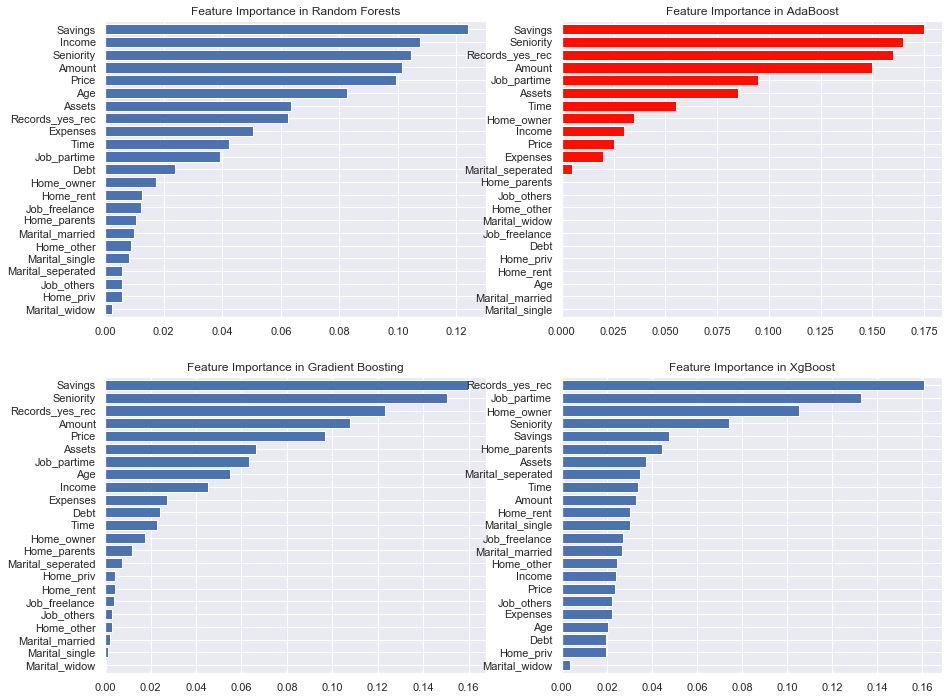

In [81]:
f,ax=plt.subplots(2,2,figsize=(15,12))
model=RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(X,y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')
model=AdaBoostClassifier(n_estimators=200,learning_rate=0.05,random_state=0)
model.fit(X,y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#FD0F00')
ax[0,1].set_title('Feature Importance in AdaBoost')
model=GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,random_state=0)
model.fit(X,y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0])
ax[1,0].set_title('Feature Importance in Gradient Boosting')
model=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
model.fit(X,y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1])
ax[1,1].set_title('Feature Importance in XgBoost')
plt.show()